В этом ноутбуке мы попробуем провести морфологический анализ слов, сосредоточив внимание на префиксах и суффиксах. 

Начнем с самого простого посимвольного перебора по всем словам.

Затем, используя статистический анализ и визуализацию, мы попробуем выявить наиболее частотные префиксы и суффиксы.

In [14]:
from collections import defaultdict

import nltk
from tqdm import tqdm

prefixes = []
suffixes = []

prefix_suffix_pairs = defaultdict(list)

with open('../data/processed/word_freqs/freq_1000000_oshhamaho.txt') as f:
    words = f.read().split('\n')

words = [word for word in words if len(word) > 2]


# посимвольный перебор в лоб возможных префиксов и суффиксов
слева направо - префиксы, справа налево - суффиксы
потом подсветим по частотности и после отсечки будут вполне правдивые* 
**иногда может захватиться лишний символ или наоборот не хватать: 
например в суффиксе `ъым` не хватает в начале буквы `к`)**

Чуть позже придумаем как исключить такие префиксы и суффиксы

In [15]:
for word in tqdm(words):
    if word in prefix_suffix_pairs:
        continue

    pref_set = []
    suf_set = []
    for i in range(1, len(word)):
        pref = word[:i]
        pref_set.append(pref)

        for j in range(i, len(word)):
            suf = word[j:]
            suf_set.append(suf)

    prefixes += list(pref_set)
    suffixes += list(suf_set)
    prefix_suffix_pairs[word].append((pref_set, suf_set))

100%|██████████| 482602/482602 [00:13<00:00, 35687.07it/s]


In [16]:
prefixes_fdist = nltk.FreqDist(prefixes)
suffixes_fdist = nltk.FreqDist(suffixes)

In [17]:
# наиболее частотные префиксы
prefixes_fdist.most_common(100)

[('к', 88406),
 ('къ', 82439),
 ('з', 57898),
 ('къы', 49169),
 ('зэ', 31305),
 ('с', 29700),
 ('щ', 28823),
 ('д', 23081),
 ('у', 22853),
 ('х', 18661),
 ('зы', 17369),
 ('сы', 16973),
 ('и', 16292),
 ('зэр', 15930),
 ('п', 14290),
 ('къыз', 12682),
 ('т', 11957),
 ('К', 11538),
 ('щы', 11436),
 ('ды', 11282),
 ('зэры', 11249),
 ('я', 11059),
 ('къыщ', 10206),
 ('щI', 9547),
 ('къызэ', 9038),
 ('Къ', 8943),
 ('къэ', 8658),
 ('е', 8452),
 ('г', 8239),
 ('къа', 8038),
 ('ф', 7980),
 ('ху', 7745),
 ('С', 7427),
 ('м', 7118),
 ('б', 6914),
 ('н', 6783),
 ('I', 6674),
 ('З', 6100),
 ('къызэр', 5961),
 ('л', 5613),
 ('къи', 5517),
 ('У', 5326),
 ('ир', 5317),
 ('къых', 5287),
 ('Д', 5063),
 ('къыт', 4647),
 ('ж', 4529),
 ('Х', 4321),
 ('къыщы', 4299),
 ('те', 4245),
 ('сык', 4172),
 ('къе', 4166),
 ('къызэры', 4116),
 ('Къы', 3971),
 ('гу', 3920),
 ('щIэ', 3888),
 ('зэх', 3870),
 ('сыкъ', 3859),
 ('М', 3845),
 ('а', 3838),
 ('ук', 3789),
 ('П', 3743),
 ('къып', 3700),
 ('къыс', 3687),
 ('Сы

In [18]:
# наиболее частотные суффиксы
suffixes_fdist.most_common(100)

[('э', 952396),
 ('м', 716092),
 ('и', 585002),
 ('р', 516555),
 ('у', 499656),
 ('щ', 414056),
 ('ым', 361493),
 ('т', 252230),
 ('ъым', 223481),
 ('рэ', 210809),
 ('ри', 208101),
 ('Iэ', 199003),
 ('къым', 198584),
 ('эм', 189595),
 ('эр', 177330),
 ('уэ', 171355),
 ('ащ', 155247),
 ('эу', 140495),
 ('кIэ', 138640),
 ('н', 134267),
 ('а', 134154),
 ('ыр', 124597),
 ('ну', 120823),
 ('ми', 117380),
 ('мэ', 100686),
 ('ауэ', 93276),
 ('ар', 88352),
 ('…', 81446),
 ('эри', 77561),
 ('хэм', 77468),
 ('рт', 74180),
 ('хэр', 68519),
 ('ур', 61248),
 ('мрэ', 61013),
 ('ын', 59499),
 ('ж', 59347),
 ('экъым', 58001),
 ('ам', 57709),
 ('ыну', 57102),
 ('I', 56403),
 ('эщ', 54114),
 ('ти', 51681),
 ('урэ', 50538),
 ('нщ', 47043),
 ('тэкъым', 46015),
 ('щи', 44909),
 ('ат', 44724),
 ('ъэ', 44663),
 ('ущ', 44287),
 ('эн', 43452),
 ('нур', 42410),
 ('эт', 41915),
 ('мкIэ', 41244),
 ('эну', 40878),
 ('акъым', 37260),
 ('эми', 36686),
 ('нущ', 34339),
 ('ркъым', 33899),
 ('рщ', 33650),
 ('жу', 33143

In [20]:
top_count = 4000

top_prefix = set([k for k, v in prefixes_fdist.most_common(top_count)])
top_suffix = set([k for k, v in suffixes_fdist.most_common(top_count)])

pairs = []

# для каждого слова у нас есть список возможных префиксов и суффиксов
# отфильтруем префиксы и суффиксы, оставив только тех, которые входят в топ
for word, value in prefix_suffix_pairs.items():
    p, s = value[0]
    pairs.append((top_prefix.intersection(p), top_suffix.intersection(s)))

In [21]:
# через Counter мы можем посмотреть наиболее частотные пары префикс-суффикс

from collections import Counter
from itertools import product

pairs_cnt = Counter()

# развернем список пар в список пар префикс-суффикс 
for p in pairs:
    pairs_cnt.update(list(product(p[0], p[1])))

pairs_cnt.most_common(100)

[(('к', 'э'), 16329),
 (('къ', 'э'), 15089),
 (('к', 'м'), 12178),
 (('к', 'и'), 11497),
 (('къ', 'м'), 11191),
 (('къ', 'и'), 10698),
 (('з', 'э'), 9911),
 (('к', 'у'), 9805),
 (('к', 'р'), 9471),
 (('къ', 'у'), 9314),
 (('къы', 'э'), 8744),
 (('къ', 'р'), 8720),
 (('к', 'щ'), 8654),
 (('з', 'р'), 8535),
 (('з', 'м'), 8534),
 (('къ', 'щ'), 8163),
 (('къы', 'м'), 6953),
 (('з', 'и'), 6909),
 (('з', 'у'), 6793),
 (('к', 'ым'), 6656),
 (('къ', 'ым'), 6242),
 (('къы', 'и'), 6086),
 (('зэ', 'р'), 5835),
 (('къы', 'р'), 5816),
 (('к', 'т'), 5713),
 (('къы', 'у'), 5460),
 (('щ', 'э'), 5444),
 (('у', 'э'), 5438),
 (('къ', 'т'), 5374),
 (('с', 'э'), 5373),
 (('зэ', 'э'), 5266),
 (('зэ', 'м'), 5187),
 (('к', 'ри'), 4929),
 (('з', 'щ'), 4734),
 (('къы', 'щ'), 4685),
 (('къ', 'ри'), 4637),
 (('д', 'э'), 4607),
 (('к', 'ащ'), 4607),
 (('щ', 'м'), 4569),
 (('зэр', 'р'), 4557),
 (('к', 'ъым'), 4495),
 (('къ', 'ащ'), 4434),
 (('к', 'къым'), 4405),
 (('къ', 'ъым'), 4327),
 (('къ', 'къым'), 4249),
 (('

In [22]:
from nltk.probability import ConditionalFreqDist

prefix_suffix_cfdist = ConditionalFreqDist()
suffix_prefix_cfdist = ConditionalFreqDist()

for pair, freq in pairs_cnt.items():
    prefix, suffix = pair
    prefix_suffix_cfdist[prefix][suffix] = freq
    suffix_prefix_cfdist[suffix][prefix] = freq

In [23]:
# через ConditionalFreqDist мы можем посмотреть наиболее частотные суффиксы для префикса
prefix_suffix_cfdist['къы'].most_common(100)

[('э', 8744),
 ('м', 6953),
 ('и', 6086),
 ('р', 5816),
 ('у', 5460),
 ('щ', 4685),
 ('ым', 3738),
 ('т', 3076),
 ('ри', 2824),
 ('ащ', 2635),
 ('а', 2574),
 ('ъым', 2542),
 ('къым', 2485),
 ('уэ', 2144),
 ('ар', 2061),
 ('Iэ', 1782),
 ('рэ', 1773),
 ('ну', 1625),
 ('ауэ', 1552),
 ('н', 1535),
 ('эм', 1455),
 ('ыр', 1389),
 ('кIэ', 1387),
 ('эу', 1357),
 ('ам', 1356),
 ('мэ', 1353),
 ('эр', 1330),
 ('ми', 1200),
 ('рт', 1168),
 ('ур', 973),
 ('эри', 959),
 ('…', 866),
 ('ыну', 865),
 ('I', 863),
 ('ын', 863),
 ('ж', 854),
 ('нур', 815),
 ('ат', 779),
 ('кI', 682),
 ('экъым', 671),
 ('акъым', 666),
 ('урэ', 648),
 ('ти', 646),
 ('тэкъым', 641),
 ('эну', 639),
 ('хэм', 610),
 ('ырт', 605),
 ('эн', 571),
 ('ыу', 550),
 ('нщ', 548),
 ('ущ', 545),
 ('Iа', 538),
 ('щи', 530),
 ('нущ', 528),
 ('ркъым', 511),
 ('хэр', 485),
 ('жащ', 483),
 ('эрт', 450),
 ('ами', 445),
 ('Iащ', 440),
 ('ынур', 440),
 ('жу', 439),
 ('эмэ', 420),
 ('мкIэ', 413),
 ('эж', 408),
 ('Iар', 406),
 ('амэ', 390),
 ('укъы

In [24]:
# так же и обратно - наиболее частотные префиксы для суффикса
suffix_prefix_cfdist['ащ'].most_common(100)

[('к', 4607),
 ('къ', 4434),
 ('къы', 2635),
 ('з', 2236),
 ('с', 1548),
 ('щ', 1244),
 ('д', 1187),
 ('зэ', 1048),
 ('сы', 965),
 ('и', 918),
 ('зы', 739),
 ('х', 720),
 ('ды', 672),
 ('я', 649),
 ('къыщ', 548),
 ('щы', 535),
 ('у', 521),
 ('т', 492),
 ('къа', 474),
 ('къыз', 469),
 ('къэ', 418),
 ('сык', 405),
 ('ир', 391),
 ('щI', 383),
 ('сыкъ', 378),
 ('къи', 358),
 ('къых', 348),
 ('е', 334),
 ('ху', 328),
 ('п', 322),
 ('К', 316),
 ('Къ', 307),
 ('къызэ', 303),
 ('къыт', 290),
 ('кър', 273),
 ('С', 260),
 ('ф', 248),
 ('ири', 245),
 ('къыс', 238),
 ('къыщы', 226),
 ('дык', 221),
 ('зык', 221),
 ('къыд', 218),
 ('къе', 212),
 ('дыкъ', 212),
 ('зыкъ', 206),
 ('зэр', 203),
 ('I', 202),
 ('щыз', 202),
 ('зэх', 188),
 ('те', 188),
 ('иг', 187),
 ('хэ', 185),
 ('игъ', 184),
 ('сыкъы', 181),
 ('къыху', 172),
 ('ук', 171),
 ('игъэ', 170),
 ('къыщI', 169),
 ('ях', 169),
 ('щызэ', 167),
 ('щIэ', 165),
 ('къри', 162),
 ('укъ', 161),
 ('къып', 160),
 ('Сы', 158),
 ('б', 155),
 ('тр', 150),


In [30]:
# посмотреть сколько слов с конкретным префиксом и суффиксом
for prefix, suffix in [
    ('къы', 'н'),
    ('къы', 'ащ'),
    ('къы', 'нущ'),
    ('къы', 'ну'),
    ('къы', 'нт'),
    ('къы', 'нут'),
]:
    print(prefix, suffix, prefix_suffix_cfdist[prefix][suffix])

къы н 1535
къы ащ 2635
къы нущ 528
къы ну 1625
къы нт 222
къы нут 165


# Визуализация
Для начала посмотрим на тепловую карту для топ пар префикс-суффикс.
 
Чем ярче ячейка на пересечении префикса и суффикса, тем частотность выше у этой пары.

**Важный момент, что словарь может быть с пробелами в данных. 
То есть слово с префиксом и суффиксом существует в языке, но в собранных данных таких слов нет.**     

In [0]:
# здесь можем настроить какие префиксы и суффиксы нам будут интересны
def is_prefix_interest(prefix):
    # return prefix in ['у', 'сы', 'фы', 'ды']
    return len(prefix) > 3

def is_suffix_interest(suffix):
    # return True
    return len(suffix) > 3

In [26]:
top_n = 50
min_freq = 20

sorted_pairs = sorted(pairs_cnt.items(), key=lambda x: x[1], reverse=True)
top_pairs = [
    ((p, s), f)
    for (p, s), f in sorted_pairs
    if is_prefix_interest(prefix=p) 
       and is_suffix_interest(suffix=s) 
       and f >= min_freq
]

top_pairs = top_pairs[:top_n]  # отсечем пары для удобства визуализации 
top_prefixes = sorted(set([p for (p, s), f in top_pairs]))
top_suffixes = sorted(set([s for (p, s), f in top_pairs]))

In [28]:
import pandas as pd

# построим матрицу для тепловой карты
# по строкам - префиксы, по столбцам - суффиксы, в ячейках - частотность
df = pd.DataFrame(index=top_prefixes, columns=top_suffixes).fillna(0)
for (prefix, suffix), freq in top_pairs:
    df.at[prefix, suffix] = freq

df.head()

,акIэ,амкIэ,къым,мкIэ,нукъым,тэкъым,укъым,ынур,ыным,экIэ,экъым,энур
зыкъ,0,0,165,0,0,0,0,0,0,0,0,0
зэры,0,120,0,284,0,0,0,334,129,0,0,186
игъэ,0,0,185,0,0,0,0,0,0,0,0,0
къах,0,0,163,0,0,0,0,0,0,0,0,0
къыд,0,0,196,0,0,0,0,0,0,0,0,0


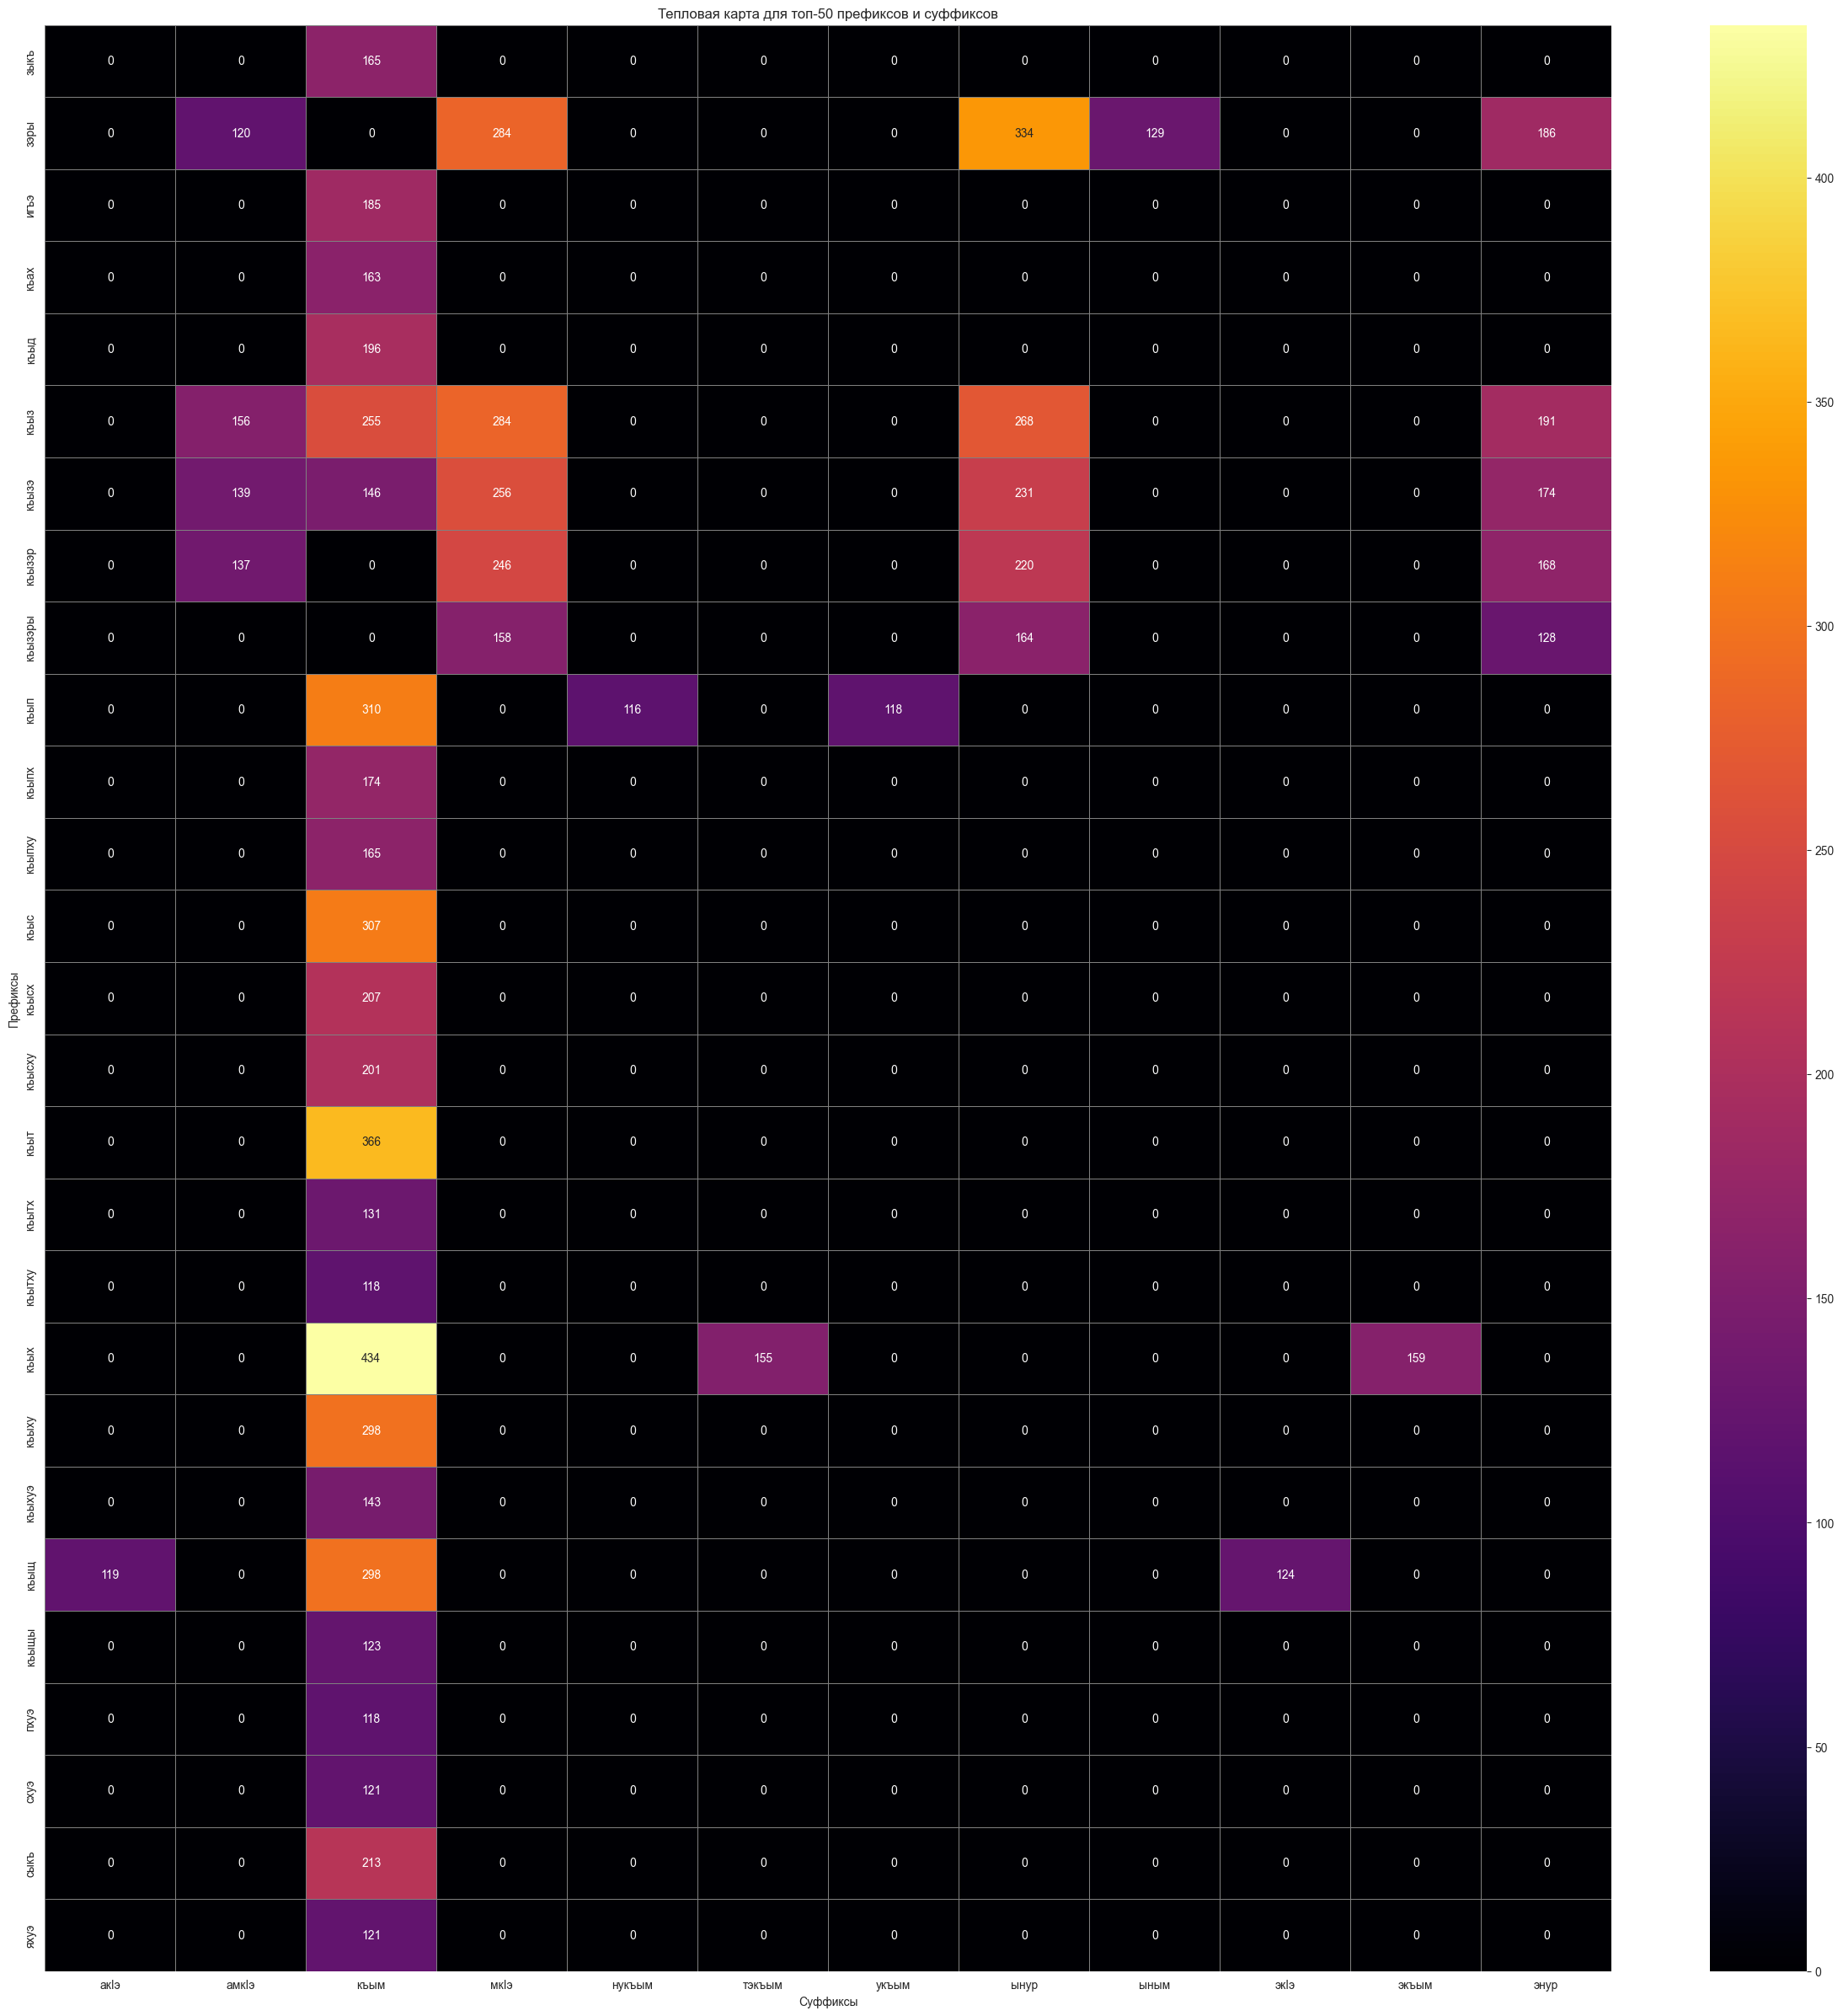

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация тепловой карты
plt.figure(figsize=(30, 30))
sns.heatmap(
    df,
    annot=True,
    cmap="inferno", 
    linewidths=.5, 
    linecolor='gray',
    fmt='d'
)
plt.title(f"Тепловая карта для топ-{top_n} префиксов и суффиксов")
plt.xlabel("Суффиксы")
plt.ylabel("Префиксы")
plt.show()